In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltimport

In [18]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [19]:
combined=pd.concat([train,test])
combined.shape #2919
#combined.iloc[:1460:,:] #train
#combined.iloc[1460:,:] #test

C:\Users\samuelmao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(2919, 81)

In [20]:
combined=combined.reset_index()

In [21]:
from preprocess import impute
all_data, encodedDic = impute (combined, False)
all_data_onehot, encodedDic = impute (combined, True) #one-hot

In [22]:
train=all_data.iloc[:1460:,:] #train
train_y=train["SalePrice"]
train_x=train[train.columns[train.columns!="SalePrice"]]
test=test.iloc[1460:,:]

train_onehot=all_data_onehot.iloc[:1460:,:] #train
train_y_onehot=train_onehot["SalePrice"]
train_x_onehot=train_onehot[train_onehot.columns[train_onehot.columns!="SalePrice"]]
test_onehot=train_onehot.iloc[1460:,:]


## RR: label encoding

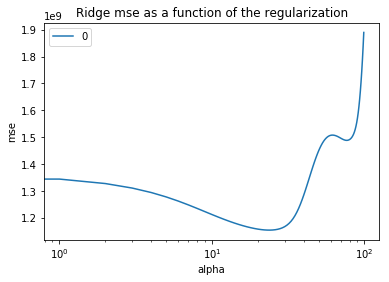

In [16]:
from sklearn import linear_model
ridge = linear_model.Ridge() # create a ridge regression instance


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=1)

alpha_100 = np.logspace(0, 8, 100)
msetotal = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    mse = mean_squared_error(y_test, ridge.predict(X_test))
    msetotal.append(mse)



df_mse = pd.DataFrame(msetotal, index=list(range(100)))
import matplotlib.pyplot as plt
title = 'Ridge mse as a function of the regularization'
axes = df_mse.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('mse')
plt.show()

In [15]:
ridge.predict(X_test)

array([181438.54067535, 181438.53271865, 181438.525794  , 181438.52057415,
       181438.52906661, 181438.54800174, 181438.54613564, 181438.53192411,
       181438.54076496, 181438.54093811, 181438.53507277, 181438.5157751 ,
       181438.54114678, 181438.54620552, 181438.5423543 , 181438.52399732,
       181438.52700595, 181438.52867922, 181438.53853897, 181438.52931255,
       181438.52551876, 181438.52941085, 181438.54181236, 181438.54947199,
       181438.52069407, 181438.53533096, 181438.528138  , 181438.53587991,
       181438.55625869, 181438.52938701, 181438.52658651, 181438.52710898,
       181438.52688347, 181438.51954409, 181438.53192117, 181438.55004992,
       181438.52929907, 181438.52012996, 181438.54319548, 181438.52454216,
       181438.53095868, 181438.52985092, 181438.52127787, 181438.52678941,
       181438.53693921, 181438.5358226 , 181438.52679789, 181438.53858698,
       181438.54346399, 181438.54003122, 181438.52242347, 181438.54307044,
       181438.52986794, 1

## RR: onehot

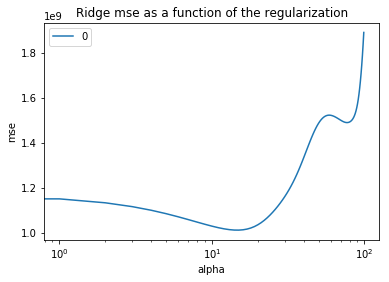

In [24]:
from sklearn import linear_model
ridge = linear_model.Ridge() # create a ridge regression instance

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(train_x_onehot, train_y_onehot, test_size=0.3, random_state=1)

alpha_100 = np.logspace(0, 8, 100)
msetotal = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    mse = mean_squared_error(y_test, ridge.predict(X_test))
    msetotal.append(mse)



df_mse = pd.DataFrame(msetotal, index=list(range(100)))
import matplotlib.pyplot as plt
title = 'Ridge mse as a function of the regularization'
axes = df_mse.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('mse')
plt.show()